# Importing Libraries

Importing the required libraires for data analysis and machine learning

In [10]:
# Data analysis libraries
import pandas as pd
import numpy as np

# Data viz libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Data preprocessing
from sklearn import preprocessing

# Data Splitting
from sklearn.model_selection import train_test_split

#ML Libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier ,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import (confusion_matrix,accuracy_score,precision_score,recall_score,f1_score)
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

import warnings 
warnings.filterwarnings('ignore')

# Dataset

Import the dataset and checking its related info

In [13]:
df = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')

In [14]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [19]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# Data Pre-Processing & Data Analysis

# Missing Values

Checking for missing values and removing/filling the missing values.

We can visualise the data with the help of a heatmap in order to know which rows are missing.

In [22]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

A better way to look at this is by visualizing the missing values

<Axes: >

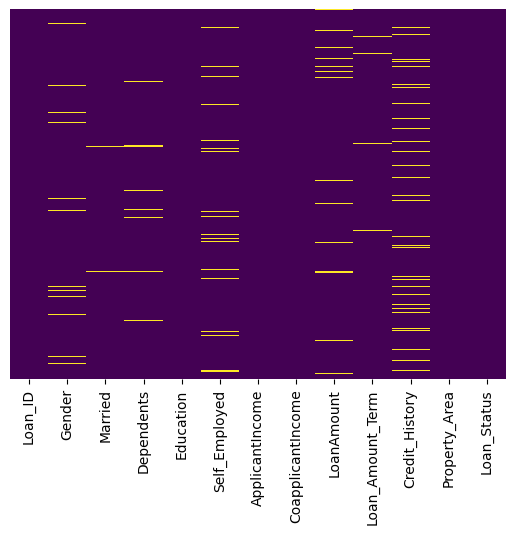

In [25]:
sns.heatmap(df.isnull(), yticklabels=False,cbar=False,cmap='viridis')

We drop the 'Loan_ID' column as it won't be a variable for the person/loanee but rather a way to identify the person which is not required for the EDA and Machine Learning

In [28]:
df.drop(['Loan_ID'], axis = 1, inplace = True)

In [29]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Removing Missing Values for categorical terms with the help of mode

In [33]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

Removing Missing Values for numerical terms with the help of mean

In [34]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

Re-verifying whether all the missing values are removed/filled.

In [35]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<Axes: >

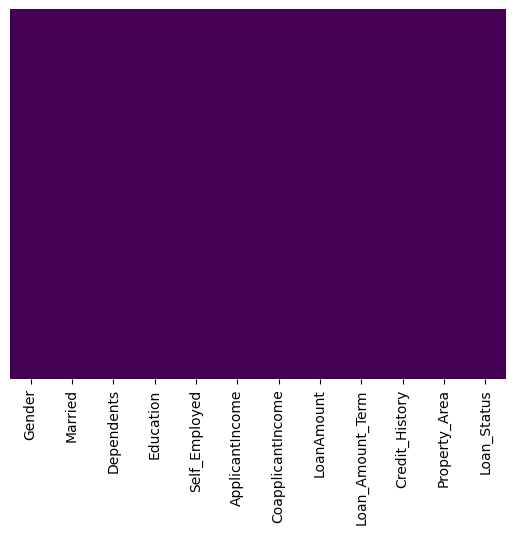

In [36]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [37]:
df.shape

(614, 12)

# Exploratory Data Analysis

We visualize all the variables in the count of their types.

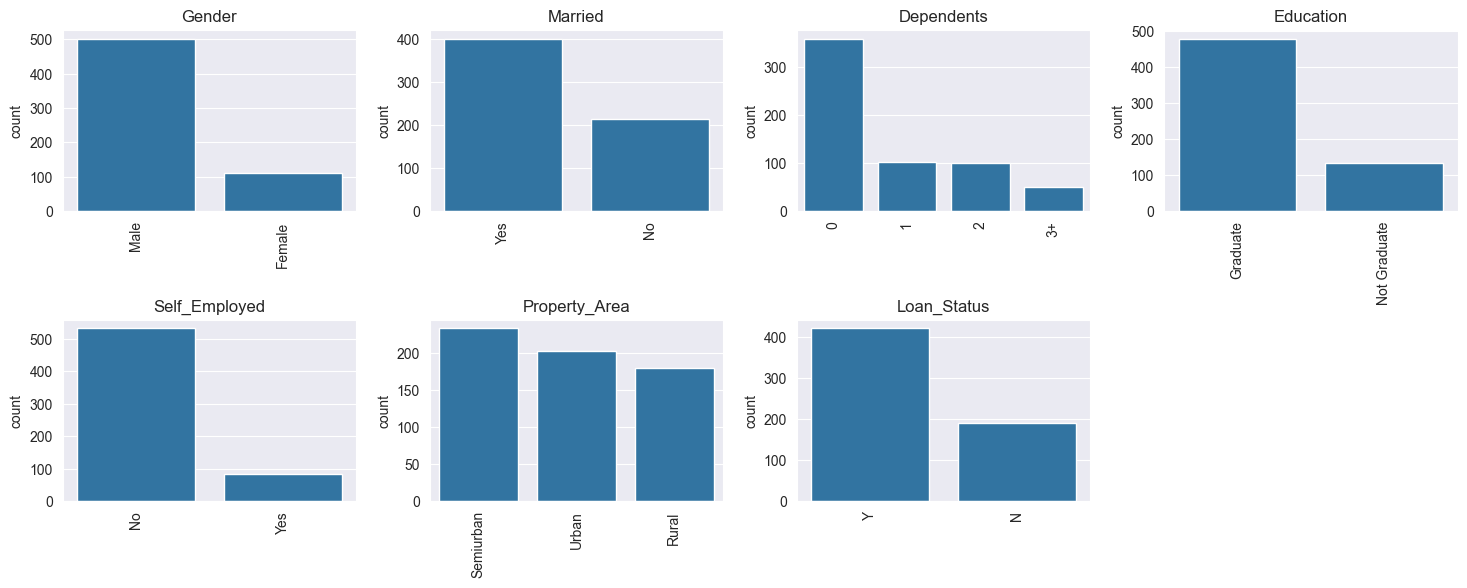

In [39]:
sns.set_style('darkgrid')
sns.set_palette('tab10')

obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)
plt.figure(figsize=(18,40))
index = 1

for col in object_cols:
    y = df[col].value_counts()
    plt.subplot(11,4,index)
    plt.xticks(rotation=90)
    plt.subplots_adjust(hspace = 0.6,wspace=0.25)
    sns.barplot(x=list(y.index), y=y).set_title(col)
    index +=1

From the above the plots we can see that most of the people applying for loans are: Male, Married, Graduates and not Self_Employed

<Axes: xlabel='CoapplicantIncome', ylabel='Count'>

<Figure size 600x2000 with 0 Axes>

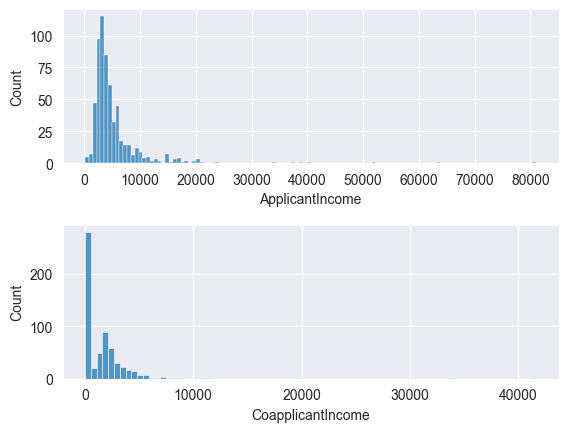

In [41]:
plt.figure(figsize=(6,20))

fig,axes = plt.subplots(2, 1, squeeze=False)

sns.histplot(df['ApplicantIncome'],ax=axes[0,0])
plt.subplots_adjust(hspace=0.4)
sns.histplot(df['CoapplicantIncome'],ax=axes[1,0])

A point to notice is that the Coapplicant Income < Applicant Income. This can be justifyed from plot 1 where we saw that most of the people had 0 dependents. Another things we can see is that the Coapplicant Income is relatively lower than the Applicant Income

<Axes: xlabel='Loan_Amount_Term', ylabel='Count'>

<Figure size 600x2000 with 0 Axes>

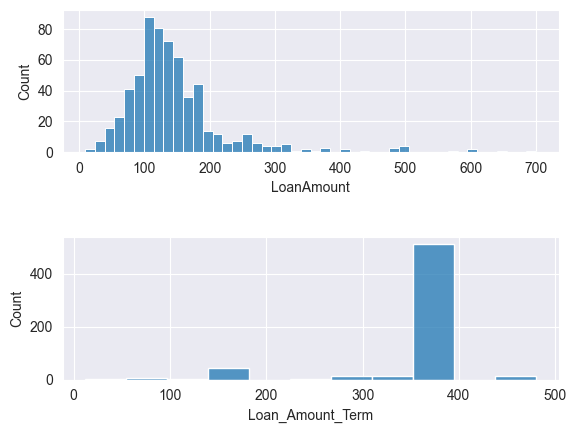

In [42]:
plt.figure(figsize=(6,20))

fig,axes = plt.subplots(2, 1, squeeze=False)

sns.histplot(df['LoanAmount'], ax=axes[0,0])
plt.subplots_adjust(hspace=0.6)
sns.histplot(df['Loan_Amount_Term'], ax=axes[1,0])

[Text(0.5, 1.0, 'Loan_Status based on Married')]

<Figure size 1000x400 with 0 Axes>

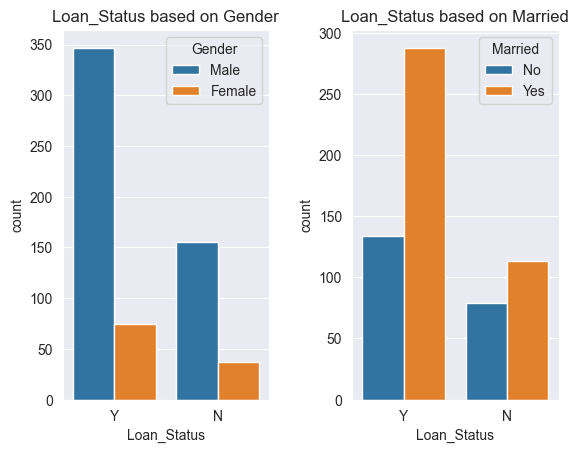

In [43]:
plt.figure(figsize=(10,4))

fig,axes = plt.subplots(1, 2, squeeze=False)

sns.countplot(ax=axes[0,0],x='Loan_Status',hue='Gender',data=df).set(title="Loan_Status based on Gender")
plt.subplots_adjust(wspace=0.4)
sns.countplot(ax=axes[0,1],x='Loan_Status',hue='Married',data=df).set(title="Loan_Status based on Married")

[Text(0.5, 1.0, 'Loan_Status based on Self_Employed')]

<Figure size 1000x400 with 0 Axes>

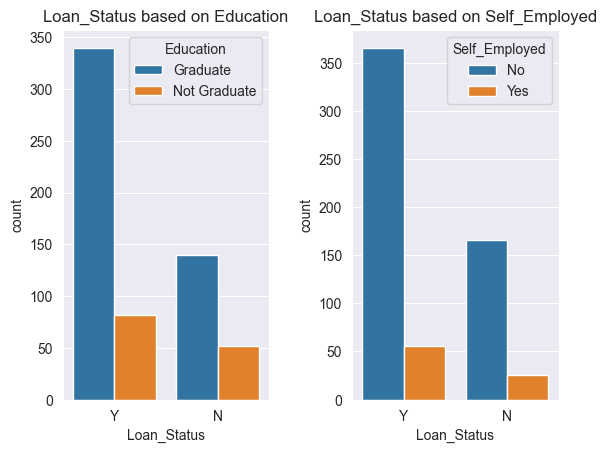

In [44]:
plt.figure(figsize=(10,4))

fig,axes = plt.subplots(1, 2, squeeze=False)

sns.countplot(ax=axes[0,0],x='Loan_Status',hue='Education',data=df).set(title="Loan_Status based on Education")
plt.subplots_adjust(wspace=0.4)
sns.countplot(ax=axes[0,1],x='Loan_Status',hue='Self_Employed',data=df).set(title="Loan_Status based on Self_Employed")

[Text(0.5, 1.0, 'Loan_Status based on Property_Area')]

<Figure size 1000x400 with 0 Axes>

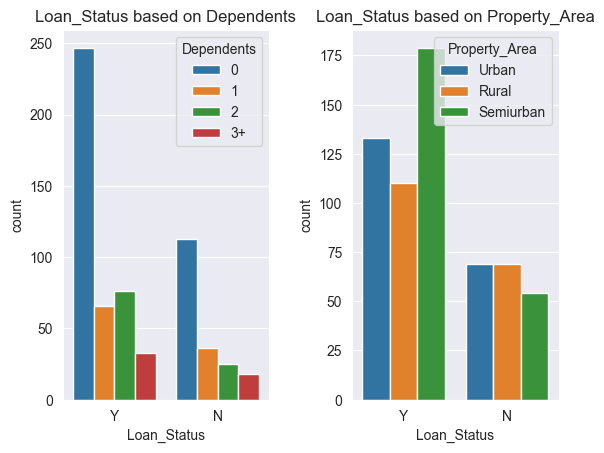

In [45]:
plt.figure(figsize=(10,4))

fig,axes = plt.subplots(1, 2, squeeze=False)

sns.countplot(ax=axes[0,0],x='Loan_Status',hue='Dependents',data=df).set(title="Loan_Status based on Dependents")
plt.subplots_adjust(wspace=0.4)
sns.countplot(ax=axes[0,1],x='Loan_Status',hue='Property_Area',data=df).set(title="Loan_Status based on Property_Area")

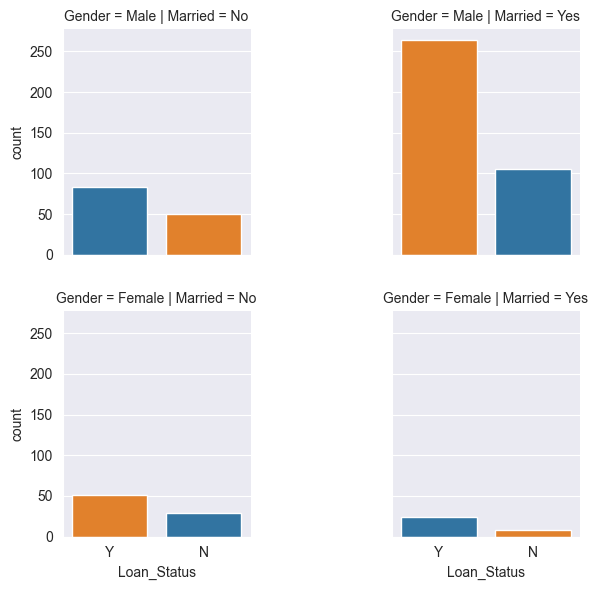

In [46]:
g = sns.FacetGrid(data=df,col='Married',row='Gender')

g.map(sns.countplot,'Loan_Status',palette="tab10")
plt.subplots_adjust(wspace = 0.75,hspace=0.25)

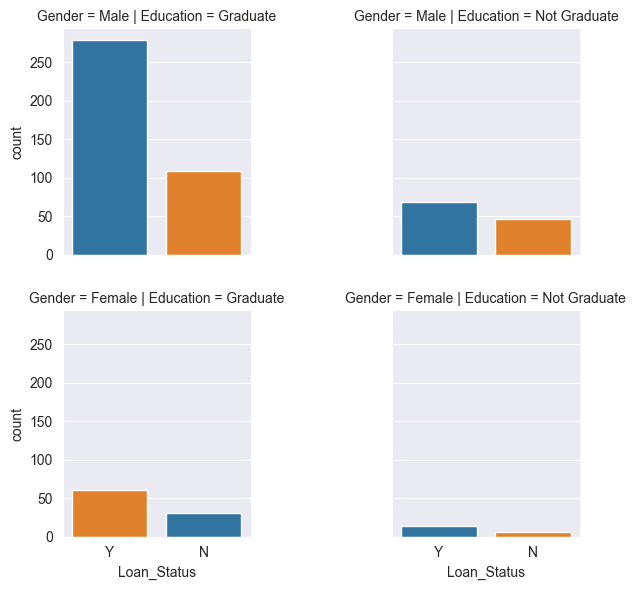

In [47]:
g = sns.FacetGrid(data=df,col='Education',row='Gender')

g.map(sns.countplot,'Loan_Status', palette="tab10")
plt.subplots_adjust(wspace = 0.75,hspace=0.25)

<Axes: xlabel='Loan_Status', ylabel='ApplicantIncome'>

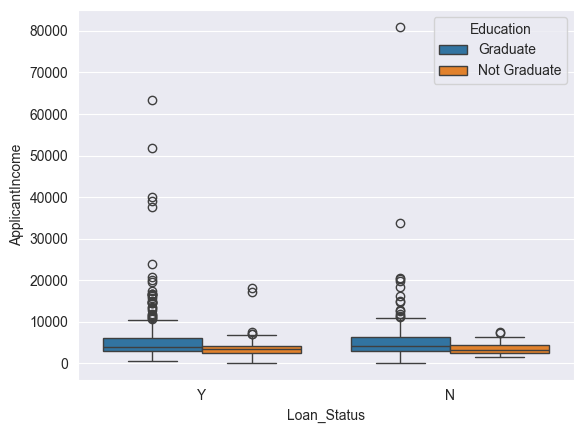

In [49]:
sns.boxplot(x='Loan_Status',y='ApplicantIncome',data=df,hue='Education')

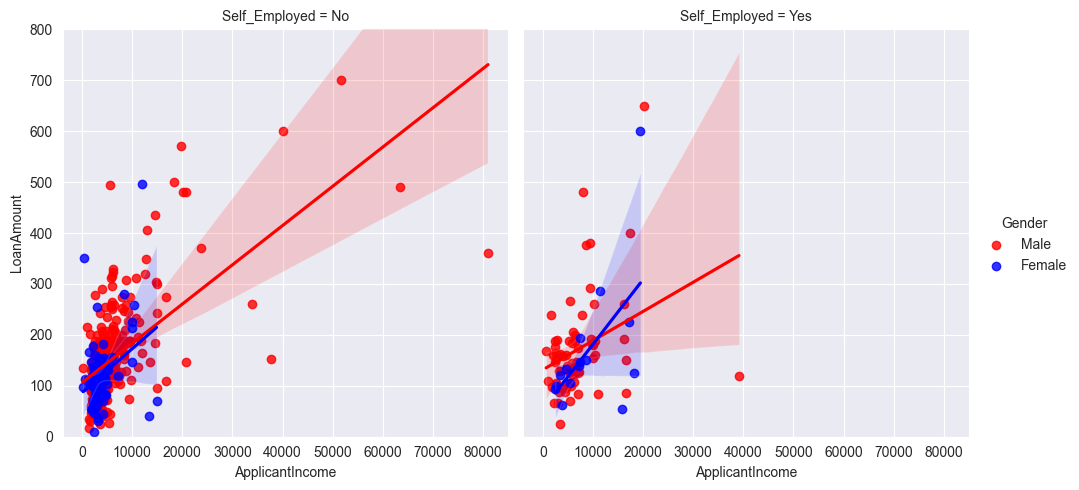

In [50]:
g = sns.lmplot(x='ApplicantIncome',y='LoanAmount',data= df , col='Self_Employed', hue='Gender',palette= ["Red" , "Blue","Yellow"])
g.set(ylim=(0, 800))

# Encoding

We now encode the 'categorical variables' i.e. 'objects' into 'floats'. We do this with the help of Label Encoder

In [53]:
obj = (df.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)))
obj

Categorical variables: 7


Gender                True
Married               True
Dependents            True
Education             True
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area         True
Loan_Status           True
dtype: bool

In [55]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [56]:
label_encoder = preprocessing.LabelEncoder()
cols = ['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status','Dependents']
for col in cols:
  df[col] = label_encoder.fit_transform(df[col])


# from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

# # Input features (categorical)
# input_cols = df[['Gender','Married','Education','Self_Employed','Property_Area','Dependents']]

# # Target column
# target_col = df['Loan_Status']

# # Ordinal encode input features
# ordinal_encoder = OrdinalEncoder()
# df[input_cols] = ordinal_encoder.fit_transform(df[input_cols])

# # Label encode target
# label_encoder = LabelEncoder()
# df[target_col] = label_encoder.fit_transform(df[target_col])


In [58]:
obj = (df.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 0


# Correlation

<Axes: >

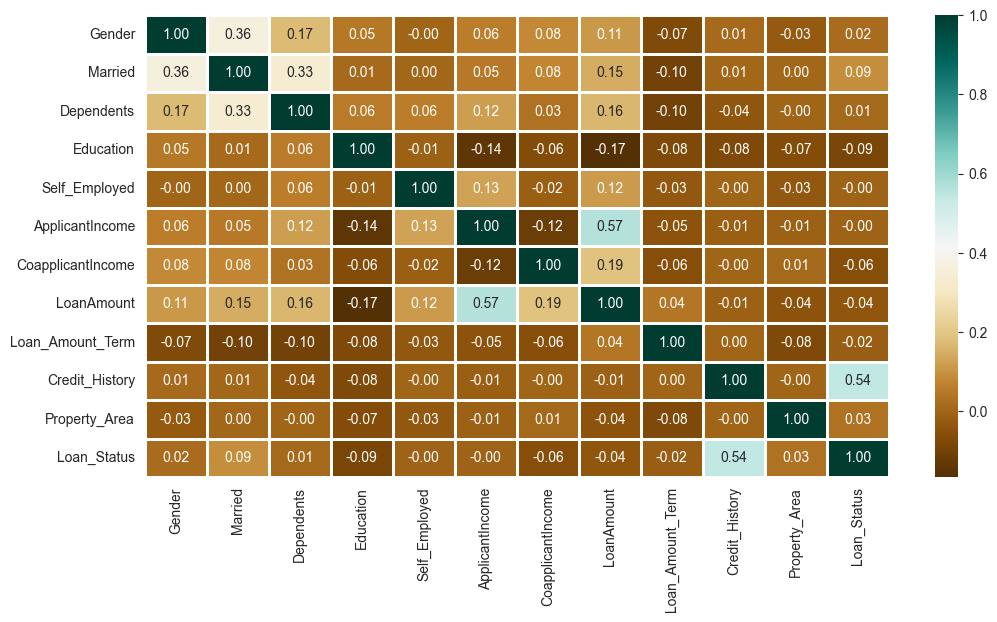

In [59]:
plt.figure(figsize=(12,6))
  
sns.heatmap(df.corr(),cmap='BrBG',fmt='.2f',linewidths=2,annot=True)

# Model Training

We are training the model in order to determine whether a person will get a Loan or not. In order to do that we need to make the model to predict/determine the 'Loan_Status'of a person.

In [94]:
from sklearn.model_selection import train_test_split
  
x_status = df.drop(['Loan_Status'],axis=1)
y_status = df['Loan_Status']
x_status.shape,y_status.shape
  
x_train, x_test, y_train, y_test = train_test_split(x_status, y_status, test_size=0.2,random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((491, 11), (123, 11), (491,), (123,))

In [95]:
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    f1_score,
    r2_score,
)
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def clf(model, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Predict on test data
    y_pred = model.predict(X_test)

    # Evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    r2 = r2_score(y_test, y_pred)  # Not standard for classification
    report = classification_report(y_test, y_pred)
    cv_score = np.mean(cross_val_score(model, X_train, y_train, cv=5))

    # Print evaluation results
    print(f"\n📌 Model: {model.__class__.__name__}")
    print("\n✅ Classification Report:\n", report)
    print(f"✅ Accuracy Score: {accuracy:.4f}")
    print(f"✅ Weighted F1 Score: {f1:.4f}")
    print(f"✅ 5-Fold Cross-Validation Accuracy: {cv_score:.4f}")

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
    plt.xlabel("Predicted", labelpad=10)
    plt.ylabel("Actual", labelpad=10)
    plt.title(f"Confusion Matrix - {model.__class__.__name__}")
    plt.tight_layout()
    plt.show()


# K-Nearest Neighbors Classifier


📌 Model: KNeighborsClassifier

✅ Classification Report:
               precision    recall  f1-score   support

           0       0.25      0.09      0.14        43
           1       0.64      0.85      0.73        80

    accuracy                           0.59       123
   macro avg       0.44      0.47      0.43       123
weighted avg       0.50      0.59      0.52       123

✅ Accuracy Score: 0.5854
✅ Weighted F1 Score: 0.5204
✅ 5-Fold Cross-Validation Accuracy: 0.6580


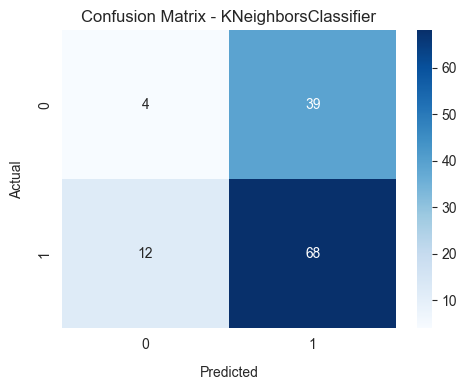

In [96]:
KNC = KNeighborsClassifier()
model_clf = KNC
clf(model_clf,x_train, x_test, y_train, y_test)

# Random Forest Classifier


📌 Model: RandomForestClassifier

✅ Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.42      0.56        43
           1       0.75      0.96      0.85        80

    accuracy                           0.77       123
   macro avg       0.81      0.69      0.70       123
weighted avg       0.79      0.77      0.75       123

✅ Accuracy Score: 0.7724
✅ Weighted F1 Score: 0.7470
✅ 5-Fold Cross-Validation Accuracy: 0.8023


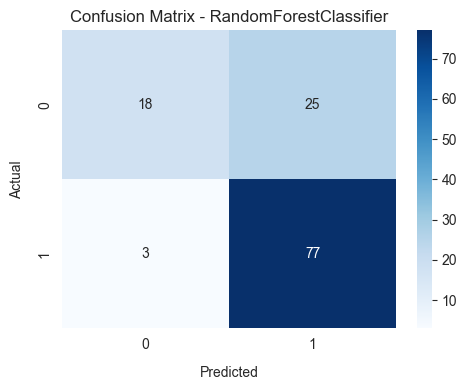

In [97]:
RFC = RandomForestClassifier()
model_clf = RFC
clf(model_clf,x_train, x_test, y_train, y_test)

# Decision Tree Classifier


📌 Model: DecisionTreeClassifier

✅ Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.51      0.54        43
           1       0.75      0.80      0.78        80

    accuracy                           0.70       123
   macro avg       0.67      0.66      0.66       123
weighted avg       0.69      0.70      0.69       123

✅ Accuracy Score: 0.6992
✅ Weighted F1 Score: 0.6945
✅ 5-Fold Cross-Validation Accuracy: 0.7108


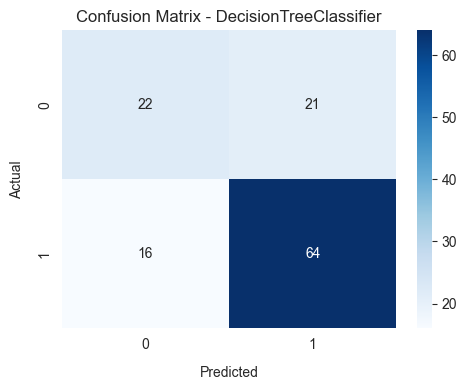

In [98]:
DTC = DecisionTreeClassifier()
model_clf = DTC
clf(model_clf,x_train, x_test, y_train, y_test)

RANDOM FOREST AND DT SEEMS TO BE OKAY, SO WE WILL DO HYPER PARAMETER TUNING WITH BOTH MODELS 

# HYPER PARAMETER USING GRID SEARCH CV 

RANDOM FOREST

Fitting 5 folds for each of 1764 candidates, totalling 8820 fits

✅ Best Parameters:
{'max_depth': 'none', 'max_features': 'sqrt', 'min_samples_leaf': 6, 'min_samples_split': 20, 'n_estimators': 100}

✅ Best Cross-Validation Accuracy:
0.8146

📌 Model: CustomRandomForest

✅ Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123

✅ Accuracy Score: 0.7886
✅ Weighted F1 Score: 0.7615
✅ 5-Fold Cross-Validation Accuracy: 0.8146


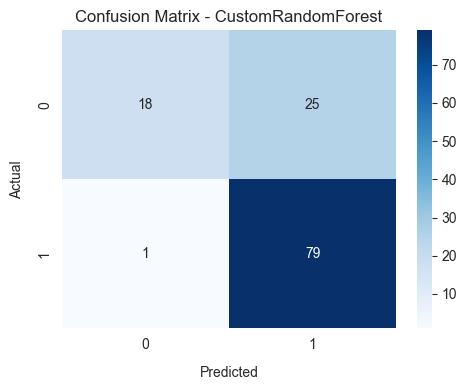

In [103]:
from sklearn.ensemble import RandomForestClassifier

# Custom RF class to convert 'none' to actual None
class CustomRandomForest(RandomForestClassifier):
    def set_params(self, **params):
        if 'max_depth' in params and params['max_depth'] == 'none':
            params['max_depth'] = None
        return super().set_params(**params)



from sklearn.model_selection import GridSearchCV

# Define full param grid (3 x 7 x 6 x 7 x 2 = 1764 combinations)
param_grid = {
    'n_estimators': [100, 200, 300],                # 3
    'max_depth': ['none', 10, 20, 30, 40, 50, 60],  # 7
    'min_samples_split': [2, 5, 10, 15, 20, 25],    # 6
    'min_samples_leaf': [1, 2, 4, 6, 8, 10, 12],    # 7
    'max_features': ['sqrt', 'log2']               # 2
}

# Use custom RF class
rf = CustomRandomForest(random_state=42)

# Grid Search setup
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=2,
    scoring='accuracy'
)

# Run the search
grid_search.fit(x_train, y_train)

# Output best params and score
print("\n✅ Best Parameters:")
print(grid_search.best_params_)

print("\n✅ Best Cross-Validation Accuracy:")
print(f"{grid_search.best_score_:.4f}")

# Evaluate best model on test set
best_rf = grid_search.best_estimator_
clf(best_rf, x_train, x_test, y_train, y_test)



DECISION TREE

Fitting 5 folds for each of 720 candidates, totalling 3600 fits

✅ Best Parameters for Decision Tree:
{'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2}

✅ Best Cross-Validation Accuracy:
0.7962

📌 Model: CustomDecisionTree

✅ Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.44      0.51        43
           1       0.74      0.85      0.79        80

    accuracy                           0.71       123
   macro avg       0.68      0.65      0.65       123
weighted avg       0.70      0.71      0.69       123

✅ Accuracy Score: 0.7073
✅ Weighted F1 Score: 0.6938
✅ 5-Fold Cross-Validation Accuracy: 0.7962


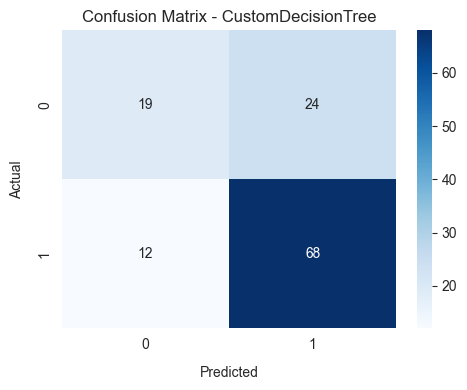

In [106]:
from sklearn.tree import DecisionTreeClassifier

# Custom DT class to convert 'none' to None
class CustomDecisionTree(DecisionTreeClassifier):
    def set_params(self, **params):
        if params.get('max_depth') == 'none':
            params['max_depth'] = None
        if params.get('max_features') == 'none':
            params['max_features'] = None
        return super().set_params(**params)


from sklearn.model_selection import GridSearchCV

# Param grid for DT (no skipping combos)
param_grid_dt = {
    'criterion': ['gini', 'entropy'],                     # 2
    'max_depth': ['none', 10, 20, 30, 40, 50],            # 6
    'min_samples_split': [2, 5, 10, 15],                  # 4
    'min_samples_leaf': [1, 2, 4, 6, 8],                  # 5
    'max_features': ['none', 'sqrt', 'log2']              # 3
}

# Use the custom Decision Tree
dt = CustomDecisionTree(random_state=42)

# GridSearchCV setup
grid_search_dt = GridSearchCV(
    estimator=dt,
    param_grid=param_grid_dt,
    cv=5,
    n_jobs=-1,
    verbose=2,
    scoring='accuracy'
)

# Run the search
grid_search_dt.fit(x_train, y_train)

# Best params + CV score
print("\n✅ Best Parameters for Decision Tree:")
print(grid_search_dt.best_params_)

print("\n✅ Best Cross-Validation Accuracy:")
print(f"{grid_search_dt.best_score_:.4f}")

# Evaluate using clf()
best_dt = grid_search_dt.best_estimator_
clf(best_dt, x_train, x_test, y_train, y_test)



# HYPER PARAMETER USING RANDOM SEARCH CV

RANDOM FOREST

Fitting 5 folds for each of 50 candidates, totalling 250 fits

✅ Best Parameters for Random Forest:
{'n_estimators': 200, 'min_samples_split': 20, 'min_samples_leaf': 8, 'max_features': 'log2', 'max_depth': 40}

✅ Best Cross-Validation Accuracy:
0.8146

📌 Model: CustomRandomForest

✅ Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123

✅ Accuracy Score: 0.7886
✅ Weighted F1 Score: 0.7615
✅ 5-Fold Cross-Validation Accuracy: 0.8146


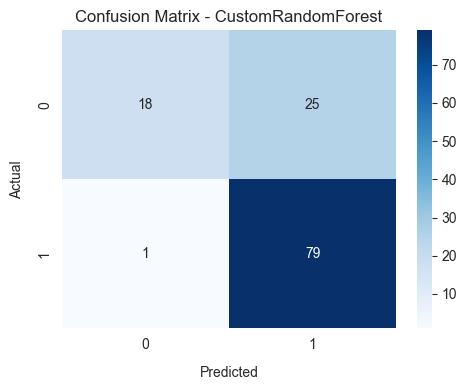

In [107]:
from sklearn.ensemble import RandomForestClassifier

class CustomRandomForest(RandomForestClassifier):
    def set_params(self, **params):
        if params.get('max_depth') == 'none':
            params['max_depth'] = None
        return super().set_params(**params)

from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Random param grid for RF
param_dist_rf = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': ['none', 10, 20, 30, 40, 50, 60],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8],
    'max_features': ['sqrt', 'log2']
}

rf = CustomRandomForest(random_state=42)

random_search_rf = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist_rf,
    n_iter=50,                     
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1,
    scoring='accuracy'
)

random_search_rf.fit(x_train, y_train)

print("\n✅ Best Parameters for Random Forest:")
print(random_search_rf.best_params_)

print("\n✅ Best Cross-Validation Accuracy:")
print(f"{random_search_rf.best_score_:.4f}")

best_rf_rand = random_search_rf.best_estimator_
clf(best_rf_rand, x_train, x_test, y_train, y_test)


DECISION TREE

Fitting 5 folds for each of 50 candidates, totalling 250 fits

✅ Best Parameters for Decision Tree:
{'min_samples_split': 2, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_depth': 10, 'criterion': 'entropy'}

✅ Best Cross-Validation Accuracy:
0.7698

📌 Model: CustomDecisionTree

✅ Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.51      0.59        43
           1       0.77      0.89      0.83        80

    accuracy                           0.76       123
   macro avg       0.74      0.70      0.71       123
weighted avg       0.75      0.76      0.74       123

✅ Accuracy Score: 0.7561
✅ Weighted F1 Score: 0.7448
✅ 5-Fold Cross-Validation Accuracy: 0.7698


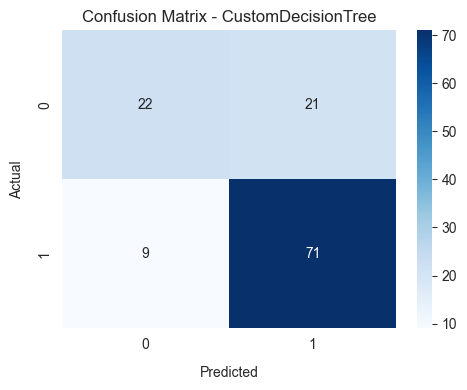

In [108]:
from sklearn.tree import DecisionTreeClassifier

class CustomDecisionTree(DecisionTreeClassifier):
    def set_params(self, **params):
        if params.get('max_depth') == 'none':
            params['max_depth'] = None
        if params.get('max_features') == 'none':
            params['max_features'] = None
        return super().set_params(**params)

param_dist_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': ['none', 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': ['none', 'sqrt', 'log2']
}

dt = CustomDecisionTree(random_state=42)

random_search_dt = RandomizedSearchCV(
    estimator=dt,
    param_distributions=param_dist_dt,
    n_iter=50,                   
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1,
    scoring='accuracy'
)

random_search_dt.fit(x_train, y_train)

print("\n✅ Best Parameters for Decision Tree:")
print(random_search_dt.best_params_)

print("\n✅ Best Cross-Validation Accuracy:")
print(f"{random_search_dt.best_score_:.4f}")

best_dt_rand = random_search_dt.best_estimator_
clf(best_dt_rand, x_train, x_test, y_train, y_test)


# Final Evaluation and Conclusion

###  Project Objective:
The goal of this project was to build a predictive model to determine whether a loan application should be approved or not (`Loan_Status`), 
based on various applicant-related features

### ⚙️ Models Evaluated:
The following classification models were trained :
- Decision Tree Classifier (DT)
- Random Forest Classifier (RF)
- K Nearest Neighbour Classifier

And then based on certain metrics (Accuracy, Weighted F1 Score, 5-Fold Cross-Validation Accuracy & Confusion Matrix), RF and DT were selected.
Then they were tuned using both Grid and Random Search CV

Each model was evaluated based on:
- Accuracy
- Weighted F1 Score
- 5-Fold Cross-Validation Accuracy
- Confusion Matrix

---

### 📊 Evaluation Summary after Grid Search CV

| Model            | Accuracy | F1 Score | Cross-Validation Score |
|------------------|----------|----------|------------------------|
| Decision Tree    | 0.70     | 0.69     | 0.79                   |
| Random Forest    | 0.78     | 0.76     | 0.81                   |



### 📊 Evaluation Summary after Random Search CV

| Model            | Accuracy | F1 Score | Cross-Validation Score |
|------------------|----------|----------|------------------------|
| Decision Tree    | 0.75     | 0.74     | 0.77                   |
| Random Forest    | 0.78     | 0.76     | 0.81                   |


---

### 🧠 Final Conclusion:

Based on the evaluation results, the Random Forest Classifier is the best-performing model for this loan prediction task. It achieved the highest test
accuracy, F1 score, and cross-validation accuracy across all models tested.

Additionally, Random Forest:
- Is robust to overfitting due to ensemble learning
- Handles both numerical and categorical data well
- Provides useful insights via feature importances

---
### ✅ Recommendation:

Deploy the **Random Forest Classifier** as the final model in the loan approval pipeline. For real-time applications, the model can be further optimized with techniques like feature selection, model pruning, or deployment via Streamlit or Flask for UI integration.

---

### 💬 Final Note:
This project demonstrates how ensemble models like Random Forest can provide reliable performance for binary classification tasks in real-world domains
like finance. With proper tuning and validation, they offer both predictive power and interpretability.

